# Ćwiczenia 1
W trakcie ćwiczeń implementowana będzie metoda przeszukiwania - Metoda gradientu prostego.
Celem ćwiczeń jest implementacja metody gradientu prostego dla dwóch funkcji oraz przebadanie wpływu rozmiaru kroku dla różnych (losowych) punktów początkowych. Należy zwizualizować proces minimalizacji na wykresie 2D.

## Punktacja:
 - obliczenie gradientów funkcji 1 pkt
 - implementacja kroku gradientu prostego 1 pkt
 - przeprowadzenie przeszukiwania minimum na obu funkcjach 1 pkt
 - wizualizacja przeszukiwania z wielu miejsc początkowych 1 pkt


In [1]:
from typing import Callable, Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

Funkcje do przeszukania:
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(\textbf{x}) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

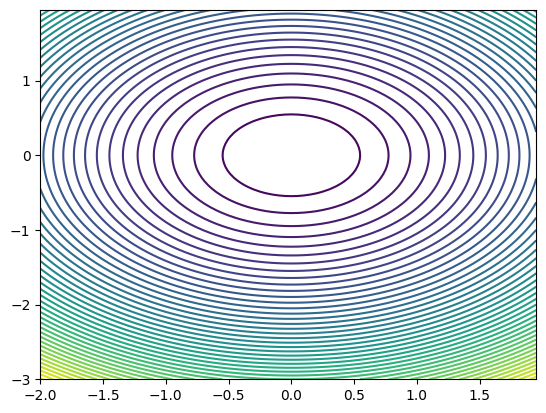

In [2]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 

# Contour plot en 2D
plt.figure()
plt.contour(X, Y, Z, 50)

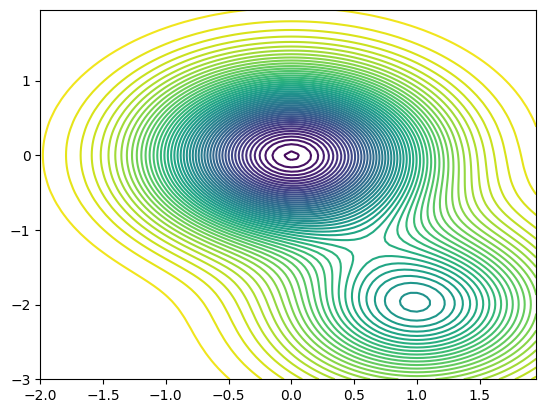

In [3]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.contour(X, Y, Z, 50)

Gradienty funkcji
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [4]:
class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(self,
                 func: Callable[[float, float], float],
                 grad_func: Callable[[float, float], Tuple[float, float]],
                 alpha:float=0.1):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = None  # trace of search

    def _calc_Z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_Z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if self.trace is not None:
            if len(self.trace)>0:
                #plt.plot(self.trace[:,0], self.trace[:,1], color="red")
                plt.scatter(self.trace[:,0], self.trace[:,1], s=10, color="red")

    def calculate_func_vale(self, x1:float, x2:float) -> float:
        return self.func(x1, x2)

    def calculate_func_grad(self, x1:float, x2:float) -> Tuple[float, float]:
        return self.grad_func(x1, x2)

    def gradient_descent_step(self, x1:float, x2:float) -> Tuple[float, float]:
        return np.array([x1, x2]) - self.alpha * np.array(self.calculate_func_grad(x1, x2))

    def minimize(self, x1_init: float, x2_init: float, steps: int,
             verbose: int = 0, plot: bool = False) -> float:
        self.trace = np.array([[x1_init, x2_init], ])
        print(f"Step: {0:<3}\tCurrent position: ({self.trace[0][0]: .2e},{self.trace[0][1]: .2e})\tAlpha: {self.alpha:<3}")
        
        total_execution_time = 0
    
        for i in range(1, steps+1):
            start_time = time.time()
            result = self.gradient_descent_step(self.trace[i - 1, 0],
                                                self.trace[i - 1, 1])
            self.trace = np.append(self.trace, np.array([result]), axis=0)
            end_time = time.time()
            
            if verbose == 1 and i % 5 == 0:
                print(f"Step: {i:<3}\tCurrent position: ({result[0]: .2e},{result[1]: .2e})\tAlpha: {self.alpha:<3}")
            elif verbose == 2:
                print(f"Step: {i:<3}\tCurrent position: ({result[0]: .3e},{result[1]: .3e})\tAlpha: {self.alpha:<3}\tValue at position: {self.calculate_func_vale(result[0], result[1]):<.4e}")
            elif verbose == 3:
                print(f"Step: {i:<3}\tCurrent position: ({result[0]: .3e},{result[1]: .3e})\tAlpha: {self.alpha:<3}\tValue at position: {self.calculate_func_vale(result[0], result[1]):<.4e}\tStep executed in {end_time-start_time:<.4e} [s]")
                
            total_execution_time += (end_time-start_time)
        
        if verbose == 2 or verbose == 3:
            print(f"\nTotal execution time: {total_execution_time:<.4e} [s]")
            
        if plot:
            self.plot_func()
    
        return self.calculate_func_vale(self.trace[-1, 0], self.trace[-1, 1])

In [5]:
g1 = lambda x, y: 1.5 - np.exp(-x**2-y**2) - 0.5*np.exp(-(x-1)**2-(y+2)**2)

def grad_g1(x, y):
    gradient = (2*x*np.exp(-x**2-y**2)+(x-1)*np.exp(-(x-1)**2-(y+2)**2),
                2*y*np.exp(-x**2-y**2)+(y+2)*np.exp(-(x-1)**2-(y+2)**2))
    return gradient

# Funkcja $f(\textbf{x})$
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
\nabla f(\textbf{x})=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

In [6]:
f = lambda x, y: x**2 + y**2
grad_f = lambda x, y: (2*x, 2*y)

In [7]:
z = lambda x, y: x**2 + y**2 - x*y
grad_z = lambda x, y: (2*x - y, 2*y - x)

Step: 0  	Current position: ( 0.00e+00, 2.00e+00)	Alpha: 0.1
Step: 1  	Current position: ( 2.000e-01, 1.600e+00)	Alpha: 0.1	Value at position: 2.2800e+00	Step executed in 6.5088e-05 [s]
Step: 2  	Current position: ( 3.200e-01, 1.300e+00)	Alpha: 0.1	Value at position: 1.3764e+00	Step executed in 1.5020e-05 [s]
Step: 3  	Current position: ( 3.860e-01, 1.072e+00)	Alpha: 0.1	Value at position: 8.8439e-01	Step executed in 1.0967e-05 [s]
Step: 4  	Current position: ( 4.160e-01, 8.962e-01)	Alpha: 0.1	Value at position: 6.0341e-01	Step executed in 5.0068e-06 [s]
Step: 5  	Current position: ( 4.224e-01, 7.586e-01)	Alpha: 0.1	Value at position: 4.3342e-01	Step executed in 3.0994e-06 [s]
Step: 6  	Current position: ( 4.138e-01, 6.491e-01)	Alpha: 0.1	Value at position: 3.2395e-01	Step executed in 1.8358e-05 [s]
Step: 7  	Current position: ( 3.959e-01, 5.607e-01)	Alpha: 0.1	Value at position: 2.4911e-01	Step executed in 9.0599e-06 [s]
Step: 8  	Current position: ( 3.728e-01, 4.881e-01)	Alpha: 0.1	V

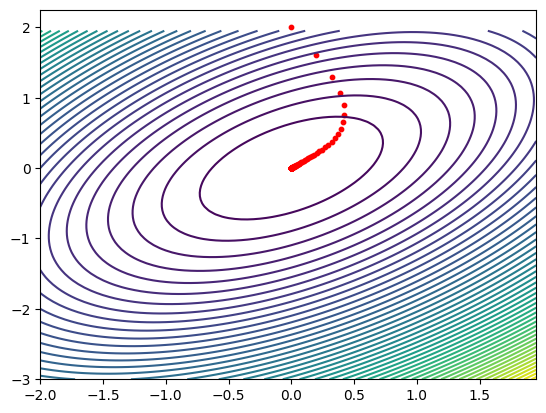

In [8]:
simple_grad_z_1 = SimpleGradientDescent(z, grad_z, alpha=0.1)
value_z_1 = simple_grad_z_1.minimize(0, 2, 100, verbose=3, plot=True)

### Pierwsze podejście

Parametry:
- Punkt początkowy $p = (-1.5, -2)$
- Parametr $\alpha = 0.1$
- Ilość kroków: $100$

Step: 0  	Current position: (-1.50e+00,-2.00e+00)	Alpha: 0.1
Step: 1  	Current position: (-1.200e+00,-1.600e+00)	Alpha: 0.1	Value at position: 4.0000e+00	Step executed in 4.5776e-05 [s]
Step: 2  	Current position: (-9.600e-01,-1.280e+00)	Alpha: 0.1	Value at position: 2.5600e+00	Step executed in 1.5259e-05 [s]
Step: 3  	Current position: (-7.680e-01,-1.024e+00)	Alpha: 0.1	Value at position: 1.6384e+00	Step executed in 7.1526e-06 [s]
Step: 4  	Current position: (-6.144e-01,-8.192e-01)	Alpha: 0.1	Value at position: 1.0486e+00	Step executed in 6.1989e-06 [s]
Step: 5  	Current position: (-4.915e-01,-6.554e-01)	Alpha: 0.1	Value at position: 6.7109e-01	Step executed in 7.1526e-06 [s]
Step: 6  	Current position: (-3.932e-01,-5.243e-01)	Alpha: 0.1	Value at position: 4.2950e-01	Step executed in 6.1989e-06 [s]
Step: 7  	Current position: (-3.146e-01,-4.194e-01)	Alpha: 0.1	Value at position: 2.7488e-01	Step executed in 5.0068e-06 [s]
Step: 8  	Current position: (-2.517e-01,-3.355e-01)	Alpha: 0.1	V

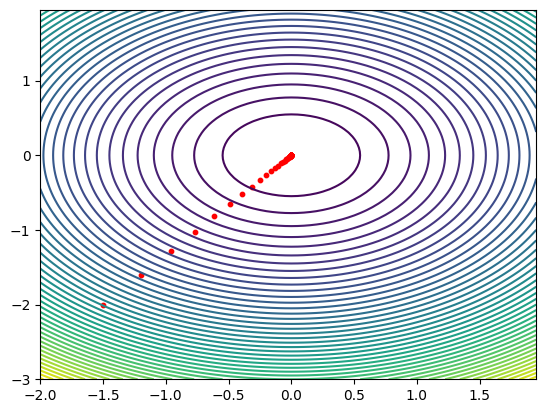

In [9]:
simple_grad_f_1 = SimpleGradientDescent(f, grad_f, alpha=0.1)
value_f_1 = simple_grad_f_1.minimize(-1.5, -2, 50, verbose=3, plot=True)

In [10]:

print(np.array([-1.2, -1.6]) - 0.1*np.array(grad_f(-1.2, -1.6)))
print(0.1*np.array(grad_f(-1.2, -1.6)))

[-0.96 -1.28]
[-0.24 -0.32]


In [11]:
print(f"Minimum at: (0, 0)\tValue at minimum: {f(0, 0):.5e}\tCalculated: {value_f_1:.5e}\tError:{abs(f(0, 0)-value_f_1):.5e}")

Minimum at: (0, 0)	Value at minimum: 0.00000e+00	Calculated: 1.27315e-09	Error:1.27315e-09


### Drugie podejście - inny punkt początkowy

Parametry:
- Punkt początkowy $p = (-1.5, 1)$
- Parametr $\alpha = 0.1$
- Ilość kroków: $50$

Step: 0  	Current position: ( 1.50e+00, 1.00e+00)	Alpha: 0.1
Step: 1  	Current position: ( 1.200e+00, 8.000e-01)	Alpha: 0.1	Value at position: 2.0800e+00	Step executed in 3.6001e-05 [s]
Step: 2  	Current position: ( 9.600e-01, 6.400e-01)	Alpha: 0.1	Value at position: 1.3312e+00	Step executed in 4.7684e-06 [s]
Step: 3  	Current position: ( 7.680e-01, 5.120e-01)	Alpha: 0.1	Value at position: 8.5197e-01	Step executed in 5.0068e-06 [s]
Step: 4  	Current position: ( 6.144e-01, 4.096e-01)	Alpha: 0.1	Value at position: 5.4526e-01	Step executed in 4.7684e-06 [s]
Step: 5  	Current position: ( 4.915e-01, 3.277e-01)	Alpha: 0.1	Value at position: 3.4897e-01	Step executed in 4.0531e-06 [s]
Step: 6  	Current position: ( 3.932e-01, 2.621e-01)	Alpha: 0.1	Value at position: 2.2334e-01	Step executed in 3.0994e-06 [s]
Step: 7  	Current position: ( 3.146e-01, 2.097e-01)	Alpha: 0.1	Value at position: 1.4294e-01	Step executed in 2.8610e-06 [s]
Step: 8  	Current position: ( 2.517e-01, 1.678e-01)	Alpha: 0.1	V

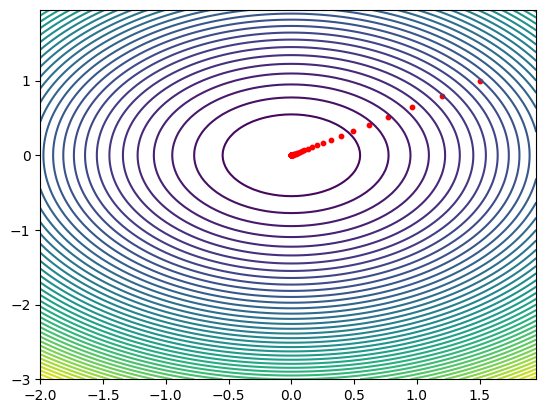

In [12]:
simple_grad_f_2 = SimpleGradientDescent(f, grad_f, alpha=0.1)
value_f_2 = simple_grad_f_2.minimize(1.5, 1, 100, verbose=3, plot=True)

In [13]:
print(f"Minimum at: (0, 0)\tValue at minimum: {f(0, 0):.5e}\tCalculated: {value_f_2:.5e}\tError:{abs(f(0, 0)-value_f_2):.5e}")

Minimum at: (0, 0)	Value at minimum: 0.00000e+00	Calculated: 1.34859e-19	Error:1.34859e-19


### Trzecie podejście - zwiększony krok

Parametry:
- Punkt początkowy $p = (-1.5, 1)$
- Parametr $\alpha = 0.5$
- Ilość kroków: $100$

Step: 0  	Current position: ( 1.50e+00, 1.00e+00)	Alpha: 0.5
Step: 1  	Current position: ( 0.000e+00, 0.000e+00)	Alpha: 0.5	Value at position: 0.0000e+00	Step executed in 4.0054e-05 [s]
Step: 2  	Current position: ( 0.000e+00, 0.000e+00)	Alpha: 0.5	Value at position: 0.0000e+00	Step executed in 1.2875e-05 [s]
Step: 3  	Current position: ( 0.000e+00, 0.000e+00)	Alpha: 0.5	Value at position: 0.0000e+00	Step executed in 1.1921e-05 [s]
Step: 4  	Current position: ( 0.000e+00, 0.000e+00)	Alpha: 0.5	Value at position: 0.0000e+00	Step executed in 1.7881e-04 [s]
Step: 5  	Current position: ( 0.000e+00, 0.000e+00)	Alpha: 0.5	Value at position: 0.0000e+00	Step executed in 9.0599e-06 [s]
Step: 6  	Current position: ( 0.000e+00, 0.000e+00)	Alpha: 0.5	Value at position: 0.0000e+00	Step executed in 5.9605e-06 [s]
Step: 7  	Current position: ( 0.000e+00, 0.000e+00)	Alpha: 0.5	Value at position: 0.0000e+00	Step executed in 2.5749e-05 [s]
Step: 8  	Current position: ( 0.000e+00, 0.000e+00)	Alpha: 0.5	V

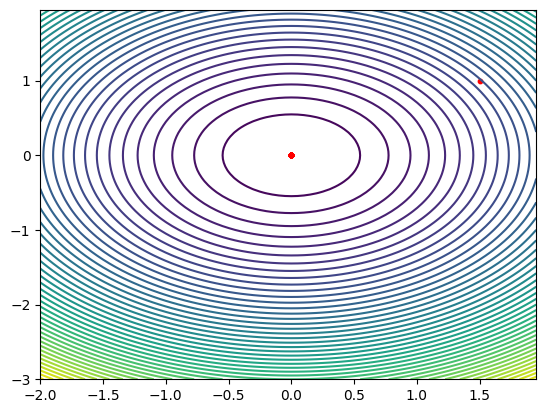

In [14]:
simple_grad_f_3 = SimpleGradientDescent(f, grad_f, alpha=0.5)
value_f_3 = simple_grad_f_3.minimize(1.5, 1, 100, verbose=3, plot=True)

In [15]:
print(f"Minimum at: (0, 0)\tValue at minimum: {f(0, 0):.5e}\tCalculated: {value_f_3:.5e}\tError:{abs(f(0, 0) - value_f_3):.5e}")

Minimum at: (0, 0)	Value at minimum: 0.00000e+00	Calculated: 0.00000e+00	Error:0.00000e+00


### Czwarte i piąte podejście - zmieniona liczba kroków

Parametry:
- Punkt początkowy $p = (1.5, 1)$
- Parametr $\alpha = 0.1$
- Ilość kroków: $10$ oraz $250$

Step: 0  	Current position: ( 1.50e+00, 1.00e+00)	Alpha: 0.1
Step: 1  	Current position: ( 1.200e+00, 8.000e-01)	Alpha: 0.1	Value at position: 2.0800e+00	Step executed in 3.7193e-05 [s]
Step: 2  	Current position: ( 9.600e-01, 6.400e-01)	Alpha: 0.1	Value at position: 1.3312e+00	Step executed in 8.8215e-06 [s]
Step: 3  	Current position: ( 7.680e-01, 5.120e-01)	Alpha: 0.1	Value at position: 8.5197e-01	Step executed in 3.8147e-06 [s]
Step: 4  	Current position: ( 6.144e-01, 4.096e-01)	Alpha: 0.1	Value at position: 5.4526e-01	Step executed in 4.0531e-06 [s]
Step: 5  	Current position: ( 4.915e-01, 3.277e-01)	Alpha: 0.1	Value at position: 3.4897e-01	Step executed in 3.0994e-06 [s]
Step: 6  	Current position: ( 3.932e-01, 2.621e-01)	Alpha: 0.1	Value at position: 2.2334e-01	Step executed in 2.8610e-06 [s]
Step: 7  	Current position: ( 3.146e-01, 2.097e-01)	Alpha: 0.1	Value at position: 1.4294e-01	Step executed in 3.0994e-06 [s]
Step: 8  	Current position: ( 2.517e-01, 1.678e-01)	Alpha: 0.1	V

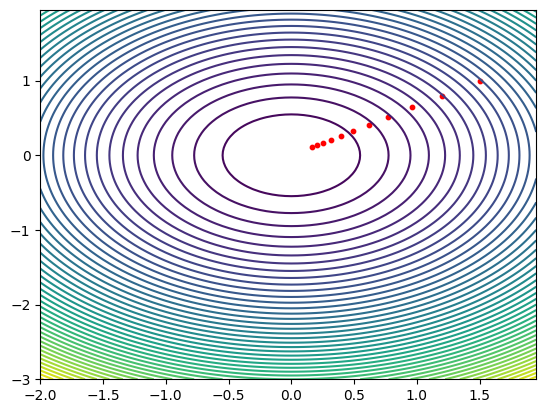

In [16]:
simple_grad_f_4 = SimpleGradientDescent(f, grad_f, alpha=0.1)
value_f_4 = simple_grad_f_4.minimize(1.5, 1, 10, verbose=3, plot=True)

In [17]:
print(f"Minimum at: (0, 0)\tValue at minimum: {f(0, 0):.5e}\tCalculated: {value_f_4:.5e}\tError:{abs(f(0, 0) - value_f_4):.5e}")

Minimum at: (0, 0)	Value at minimum: 0.00000e+00	Calculated: 3.74699e-02	Error:3.74699e-02


Step: 0  	Current position: ( 1.50e+00, 1.00e+00)	Alpha: 0.1
Step: 1  	Current position: ( 1.200e+00, 8.000e-01)	Alpha: 0.1	Value at position: 2.0800e+00	Step executed in 2.5988e-05 [s]
Step: 2  	Current position: ( 9.600e-01, 6.400e-01)	Alpha: 0.1	Value at position: 1.3312e+00	Step executed in 1.8835e-05 [s]
Step: 3  	Current position: ( 7.680e-01, 5.120e-01)	Alpha: 0.1	Value at position: 8.5197e-01	Step executed in 9.0599e-06 [s]
Step: 4  	Current position: ( 6.144e-01, 4.096e-01)	Alpha: 0.1	Value at position: 5.4526e-01	Step executed in 5.2452e-06 [s]
Step: 5  	Current position: ( 4.915e-01, 3.277e-01)	Alpha: 0.1	Value at position: 3.4897e-01	Step executed in 6.1989e-06 [s]
Step: 6  	Current position: ( 3.932e-01, 2.621e-01)	Alpha: 0.1	Value at position: 2.2334e-01	Step executed in 5.9605e-06 [s]
Step: 7  	Current position: ( 3.146e-01, 2.097e-01)	Alpha: 0.1	Value at position: 1.4294e-01	Step executed in 5.9605e-06 [s]
Step: 8  	Current position: ( 2.517e-01, 1.678e-01)	Alpha: 0.1	V

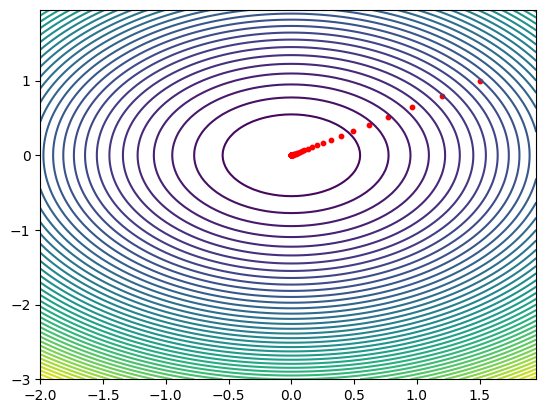

In [18]:
simple_grad_f_5 = SimpleGradientDescent(f, grad_f, alpha=0.1)
value_f_5 = simple_grad_f_5.minimize(1.5, 1, 250, verbose=3, plot=True)

In [19]:
print(f"Minimum at: (0, 0)\tValue at minimum: {f(0, 0):.5e}\tCalculated: {value_f_5:.5e}\tError:{abs(f(0, 0) - value_f_5):.5e}")

Minimum at: (0, 0)	Value at minimum: 0.00000e+00	Calculated: 1.13993e-48	Error:1.13993e-48


## Minimalizacja funkcji $f(\textbf{x})$ - wnioski

Jak widać na podstawie pięciu podejść zmiany parametrów początkowych algorytmu mogą mieć różny wpływ na ostateczne rozwiazanie.
W pierwszym przypadku, dla podstawowych wartości, widzimy, że algorytm sukcesywnie zbiega do minimum funkcji w punkcie $(0, 0)$ osiągjąc ostatecznie błąd $\epsilon = 1.86728e-19$. Jest do bardzo dobry wynik, jednak funkcja też nie jest zbyt skompliwowana.

W drugim przypadku, dla innego punktu początkowego i tych samych parametrów algorytmu, możemy zauważyć, że następuje zbieżność do tego samego punktu.

Trzeci przypadek rozważa pięciokrotne zwiększenie parametru $\alpha$, co teoretycznie powinno prowadzić do pogorszenia się właściwości algorytmu. W tym przypadku teoria pokrywa się z praktyką, ponieważ możemy zauważyć, że algorytm ma problem ze zbieganiem do minimum i w pewnym momencie zaczyna oscylować wokół minimum, nigdy go nie osiągając. Ma to swoją konsekwencję w postaci ostatecznego błędu rozwiązania, który ulega znacznemu pogorszeniu względem poprzednich dwóch podejść i wynosi $\epsilon = 5.18815e-02$

W czwartym i piątym podejściu, które opiszę tutaj łącznie, rozważany był wpływ ilości kroków na jakość rozwiązania. Z przeprowadzonych prób jednoznacznie wynika, że dla ilości kroków równej 10 i parametru $\alpha = 0.1$ algorytm nie zdąża zbiec do minium i zatrzymuje się w punkcie $(2.013e-01,2.013e-01)$ co skutkuje błędem rozwiązania o wartości $\epsilon = 8.10649e-02$. Z drugiej strony pięciokrotne zwiększenie ilości kroków powoduje znaczącą poprawę jakości rozwiązania osiągając ostatecznie wartość błędu na poziomie  $\epsilon = 1.57836e-48$


# Funkcja $g(\textbf{x})$
### Funkcja
\begin{equation}
g(\textbf{x}) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}
### Gradient
\begin{equation}
\nabla g(\textbf{x})=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [20]:
g = lambda x, y: 1.5 - np.exp(-x**2-y**2) - 0.5*np.exp(-(x-1)**2-(y+2)**2)

def grad_g(x, y):
    gradient = (2*x*np.exp(-x**2-y**2)+(x-1)*np.exp(-(x-1)**2-(y+2)**2),
                2*y*np.exp(-x**2-y**2)+(y+2)*np.exp(-(x-1)**2-(y+2)**2))
    return gradient


### Pierwsze podejście

Parametry:
- Punkt początkowy $p = (-0.5, 1)$
- Parametr $\alpha = 0.1$
- Ilość kroków: $100$

Step: 0  	Current position: ( 4.00e-01,-1.20e+00)	Alpha: 0.1
Step: 1  	Current position: ( 4.059e-01,-1.181e+00)	Alpha: 0.1	Value at position: 1.1101e+00	Step executed in 3.6001e-05 [s]
Step: 2  	Current position: ( 4.102e-01,-1.161e+00)	Alpha: 0.1	Value at position: 1.1057e+00	Step executed in 1.1921e-05 [s]
Step: 3  	Current position: ( 4.128e-01,-1.139e+00)	Alpha: 0.1	Value at position: 1.1008e+00	Step executed in 1.4782e-05 [s]
Step: 4  	Current position: ( 4.136e-01,-1.116e+00)	Alpha: 0.1	Value at position: 1.0951e+00	Step executed in 1.2636e-05 [s]
Step: 5  	Current position: ( 4.125e-01,-1.090e+00)	Alpha: 0.1	Value at position: 1.0882e+00	Step executed in 1.4067e-05 [s]
Step: 6  	Current position: ( 4.095e-01,-1.062e+00)	Alpha: 0.1	Value at position: 1.0800e+00	Step executed in 2.7180e-05 [s]
Step: 7  	Current position: ( 4.044e-01,-1.032e+00)	Alpha: 0.1	Value at position: 1.0697e+00	Step executed in 1.4305e-05 [s]
Step: 8  	Current position: ( 3.970e-01,-9.977e-01)	Alpha: 0.1	V

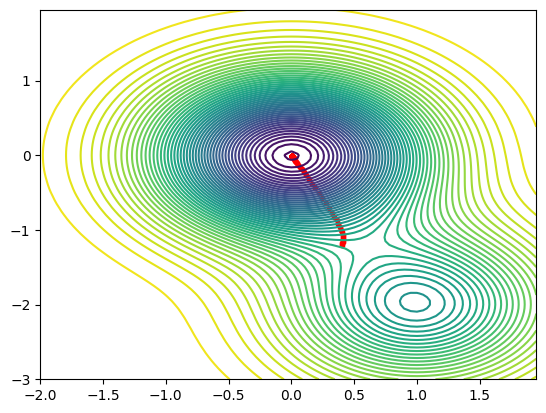

In [21]:
simple_grad_g_1 = SimpleGradientDescent(g, grad_g, alpha=0.1)
value_g_1 = simple_grad_g_1.minimize(0.4, -1.2, 100, verbose=3, plot=True)

In [22]:
print(f"Minimum at: (0, 0)\tValue at minimum: {g(0, 0):.5e}\tCalculated: {value_g_1:.5e}\tError:{abs(g(0, 0) - value_g_1):.5e}")

Minimum at: (0, 0)	Value at minimum: 4.96631e-01	Calculated: 4.96572e-01	Error:5.85428e-05


### Drugie podejście - zmieniony punkt początkowy

Parametry:
- Punkt początkowy $p = (1.5, -3)$
- Parametr $\alpha = 0.1$
- Ilość kroków: $100$

Step: 0  	Current position: (-1.00e+00,-2.00e+00)	Alpha: 0.1
Step: 1  	Current position: (-9.950e-01,-1.997e+00)	Alpha: 0.1	Value at position: 1.4838e+00	Step executed in 1.7309e-04 [s]
Step: 2  	Current position: (-9.899e-01,-1.995e+00)	Alpha: 0.1	Value at position: 1.4834e+00	Step executed in 3.9101e-05 [s]
Step: 3  	Current position: (-9.847e-01,-1.992e+00)	Alpha: 0.1	Value at position: 1.4831e+00	Step executed in 2.5988e-05 [s]
Step: 4  	Current position: (-9.794e-01,-1.989e+00)	Alpha: 0.1	Value at position: 1.4827e+00	Step executed in 1.2159e-05 [s]
Step: 5  	Current position: (-9.741e-01,-1.986e+00)	Alpha: 0.1	Value at position: 1.4824e+00	Step executed in 6.9141e-06 [s]
Step: 6  	Current position: (-9.686e-01,-1.983e+00)	Alpha: 0.1	Value at position: 1.4820e+00	Step executed in 6.9141e-06 [s]
Step: 7  	Current position: (-9.630e-01,-1.980e+00)	Alpha: 0.1	Value at position: 1.4816e+00	Step executed in 6.1989e-06 [s]
Step: 8  	Current position: (-9.574e-01,-1.977e+00)	Alpha: 0.1	V

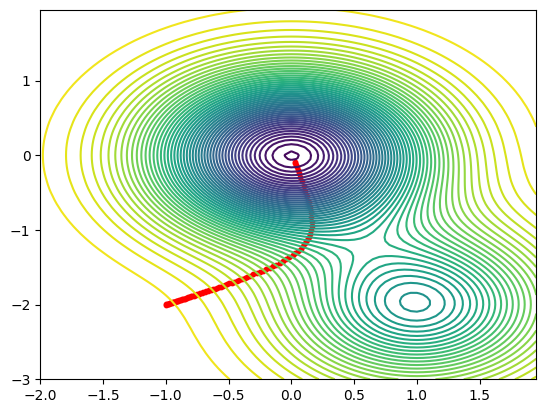

In [23]:
simple_grad_g_2 = SimpleGradientDescent(g, grad_g, alpha=0.1)
value_g_2 = simple_grad_g_2.minimize(-1, -2, 100, verbose=3, plot=True)

In [24]:
print(f"Minimum at: (0, 0)\tValue at minimum: {g(0, 0):.5e}\tCalculated: {value_g_2:.5e}\tError:{abs(g(0, 0) - value_g_2):.5e}")

Minimum at: (0, 0)	Value at minimum: 4.96631e-01	Calculated: 5.03641e-01	Error:7.01036e-03


### Trzecie podejście - zmieniona wartość parametru $\alpha$

Parametry:
- Punkt początkowy $p = (-0.5, 1)$
- Parametr $\alpha = 0.5$
- Ilość kroków: $100$

Step: 0  	Current position: (-5.00e-01, 1.00e+00)	Alpha: 0.5
Step: 1  	Current position: (-3.567e-01, 7.135e-01)	Alpha: 0.5	Value at position: 9.7071e-01	Step executed in 7.7009e-05 [s]
Step: 2  	Current position: (-1.679e-01, 3.357e-01)	Alpha: 0.5	Value at position: 6.3088e-01	Step executed in 2.9087e-05 [s]
Step: 3  	Current position: (-2.142e-02, 4.285e-02)	Alpha: 0.5	Value at position: 4.9958e-01	Step executed in 2.6941e-05 [s]
Step: 4  	Current position: ( 2.722e-03,-5.444e-03)	Alpha: 0.5	Value at position: 4.9658e-01	Step executed in 2.5988e-05 [s]
Step: 5  	Current position: ( 3.452e-03,-6.905e-03)	Alpha: 0.5	Value at position: 4.9657e-01	Step executed in 2.9802e-05 [s]
Step: 6  	Current position: ( 3.475e-03,-6.951e-03)	Alpha: 0.5	Value at position: 4.9657e-01	Step executed in 5.5075e-05 [s]
Step: 7  	Current position: ( 3.476e-03,-6.952e-03)	Alpha: 0.5	Value at position: 4.9657e-01	Step executed in 1.5736e-05 [s]
Step: 8  	Current position: ( 3.476e-03,-6.952e-03)	Alpha: 0.5	V

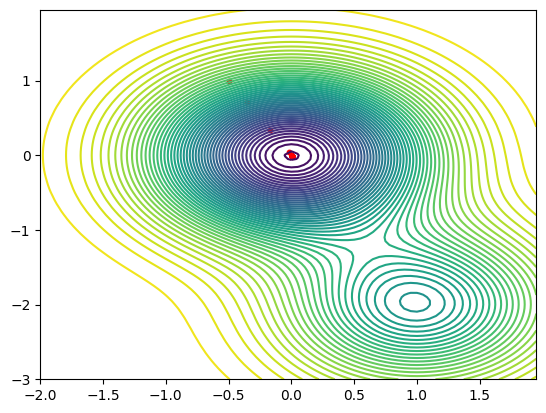

In [25]:
simple_grad_g_3 = SimpleGradientDescent(g, grad_g, alpha=0.5)
value_g_3 = simple_grad_g_3.minimize(-0.5, 1, 100, verbose=3, plot=True)

In [26]:
print(f"Minimum at: (0, 0)\tValue at minimum: {g(0, 0):.5e}\tCalculated: {value_g_3:.5e}\tError:{abs(g(0, 0) - value_g_3):.5e}")

Minimum at: (0, 0)	Value at minimum: 4.96631e-01	Calculated: 4.96572e-01	Error:5.85428e-05


### Czwarte i piąte podejście - zmieniona ilość kroków

Parametry:
- Punkt początkowy $p = (-0.5, 1)$
- Parametr $\alpha = 0.1$
- Ilość kroków: $10$ oraz $250$

Step: 0  	Current position: (-5.00e-01, 1.00e+00)	Alpha: 0.1
Step: 1  	Current position: (-4.713e-01, 9.427e-01)	Alpha: 0.1	Value at position: 1.1707e+00	Step executed in 8.6069e-05 [s]
Step: 2  	Current position: (-4.403e-01, 8.806e-01)	Alpha: 0.1	Value at position: 1.1206e+00	Step executed in 2.0981e-05 [s]
Step: 3  	Current position: (-4.069e-01, 8.138e-01)	Alpha: 0.1	Value at position: 1.0630e+00	Step executed in 2.2888e-05 [s]
Step: 4  	Current position: (-3.713e-01, 7.426e-01)	Alpha: 0.1	Value at position: 9.9809e-01	Step executed in 1.8835e-05 [s]
Step: 5  	Current position: (-3.340e-01, 6.681e-01)	Alpha: 0.1	Value at position: 9.2753e-01	Step executed in 1.8835e-05 [s]
Step: 6  	Current position: (-2.958e-01, 5.916e-01)	Alpha: 0.1	Value at position: 8.5420e-01	Step executed in 1.9073e-05 [s]
Step: 7  	Current position: (-2.576e-01, 5.151e-01)	Alpha: 0.1	Value at position: 7.8210e-01	Step executed in 1.7881e-05 [s]
Step: 8  	Current position: (-2.205e-01, 4.411e-01)	Alpha: 0.1	V

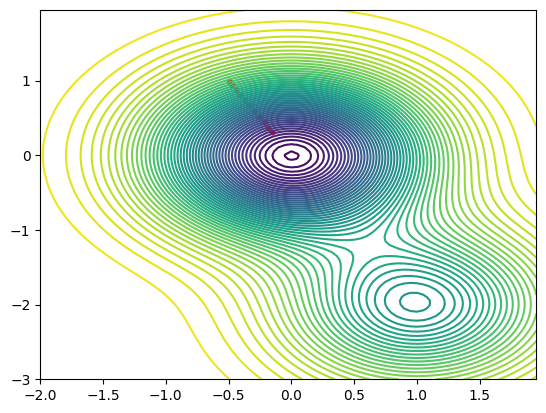

In [27]:
simple_grad_g_4 = SimpleGradientDescent(g, grad_g, alpha=0.1)
value_g_4 = simple_grad_g_4.minimize(-0.5, 1, 10, verbose=3, plot=True)

In [28]:
print(f"Minimum at: (0, 0)\tValue at minimum: {g(0, 0):.5e}\tCalculated: {value_g_4:.5e}\tError:{abs(g(0, 0) - value_g_4):.5e}")

Minimum at: (0, 0)	Value at minimum: 4.96631e-01	Calculated: 6.11866e-01	Error:1.15235e-01


Step: 0  	Current position: ( 1.50e+00,-1.00e+00)	Alpha: 0.1
Step: 1  	Current position: ( 1.474e+00,-1.021e+00)	Alpha: 0.1	Value at position: 1.3067e+00	Step executed in 5.4836e-05 [s]
Step: 2  	Current position: ( 1.448e+00,-1.043e+00)	Alpha: 0.1	Value at position: 1.2949e+00	Step executed in 9.0599e-06 [s]
Step: 3  	Current position: ( 1.421e+00,-1.065e+00)	Alpha: 0.1	Value at position: 1.2825e+00	Step executed in 6.9141e-06 [s]
Step: 4  	Current position: ( 1.394e+00,-1.089e+00)	Alpha: 0.1	Value at position: 1.2696e+00	Step executed in 5.7220e-06 [s]
Step: 5  	Current position: ( 1.367e+00,-1.113e+00)	Alpha: 0.1	Value at position: 1.2563e+00	Step executed in 5.9605e-06 [s]
Step: 6  	Current position: ( 1.340e+00,-1.139e+00)	Alpha: 0.1	Value at position: 1.2426e+00	Step executed in 5.9605e-06 [s]
Step: 7  	Current position: ( 1.314e+00,-1.165e+00)	Alpha: 0.1	Value at position: 1.2286e+00	Step executed in 5.9605e-06 [s]
Step: 8  	Current position: ( 1.288e+00,-1.192e+00)	Alpha: 0.1	V

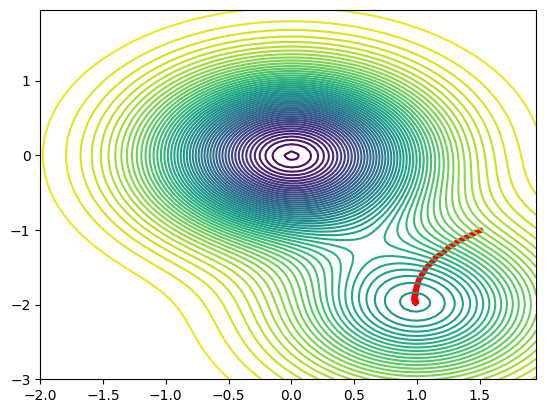

In [29]:
simple_grad_g_5 = SimpleGradientDescent(g, grad_g, alpha=0.1)
value_g_5 = simple_grad_g_5.minimize(1.5, -1, 250, verbose=3, plot=True)

In [30]:
print(f"Minimum at: (0, 0)\tValue at minimum: {g(0, 0):.5e}\tCalculated: {value_g_5:.5e}\tError:{abs(g(0, 0) - value_g_5):.5e}")

Minimum at: (0, 0)	Value at minimum: 4.96631e-01	Calculated: 9.92742e-01	Error:4.96111e-01


## Minimalizacja funkcji $g(\textbf{x})$ - wnioski

Na samym początku należy zauważyć, że w przeciwieństwie do funkcji $f(\textbf{x})$ , funkcja $g(\textbf{x})$ posiada dwa minima lokalne, z których interesuje nas to, które jest jednocześnie minimum globalnym.

Tak samo jak w dla pierwszej funkcji, w tym przypadku widzimy zmianę zachowania algorytmu w zależności od zmian parametrów.

W pierwszym przypadku, dla podstawowych wartości, widzimy, że algorytm sukcesywnie zbiega do minimum funkcji w punkcie $(0, 0)$ osiągjąc ostatecznie błąd $\epsilon = 1.40613e-05$. Nie jest to wynik wybitny, w porównaniu do pierwszego podejścia dla funkcji $f(\textbf{x})$, natomiast nie jest też tragiczny.

Drugi podejście jest w tym przypadku ciekawsze, ponieważ zakłada start z punktu, który położony jest dalej od minimum globalnego i znajduje się blisko innego minimum o aspekcie lokalnym. Algorym radzi sobie z tym problemem bardzo dobrze, ciągle dążąc do minimum globalnego i osiągając ostatecznie rozwiązanie o błędzie tego samego rzędu.

W trzecim podejściu tak samo rozważamy pięciokrotne zwiększenie parametru $\alpha$, co jak już wspomnieliśmy powinno prowadzić do pogorszenia się rozwiązania, ze względu na oscylacje. Praktyka w tym przypadku okazuje się jednak zaskakująca, ponieważ pomimo występowania oscylacji, algorytm ostatecznie znajduje rozwiązanie, którego błąd jest mniejszy od tego z pierwszego i drugiego podejścia i wynosi $\epsilon = 5.16590e-06$.

Czwarte i piątek podejście, w przypadku rozważanej funkcji, które tak samo rozważa wpływ zmiany ilości kroków na jakość rozwiazania potwierdza obserwacje uzyskane przy badaniach algorytmu na funkcji $f(\textbf{x})$. Pięciokrotne zmniejszenie ilości kroków nie powoduje tak znaczącego pogorszenia wartości rozwiazania, w rozumieniu wartości funkcji w punkcie będącym rozwiązaniem, jednakże widoczne jest, że rozwiązanie to znajduje się dalej od rzeczywistego rozwiązania, które znajduje się w punkcie $(0, 0)$. Jest to spowodowane wolną spadkiem wartości funkcji w sąsiedztwie minimum globalnego. W przypadku pięciokrotnego zwiększenia ilości kroków, tak samo jak w przypadku funkcji $f(\textbf{x})$ zauważalna jest poprawa jakości rozwiązania, jednak nie jest ona aż tak spektakularna.

In [31]:
simple_grad_g_5.trace

array([[ 1.5       , -1.        ],
       [ 1.4740425 , -1.02089564],
       [ 1.44768728, -1.04268182],
       [ 1.4210298 , -1.06536844],
       [ 1.39418205, -1.08895734],
       [ 1.36727198, -1.11344094],
       [ 1.34044201, -1.13880086],
       [ 1.31384659, -1.16500665],
       [ 1.28764869, -1.19201462],
       [ 1.26201535, -1.21976695],
       [ 1.23711256, -1.24819101],
       [ 1.21309965, -1.27719911],
       [ 1.19012367, -1.30668858],
       [ 1.16831419, -1.3365425 ],
       [ 1.14777888, -1.36663095],
       [ 1.12860026, -1.39681292],
       [ 1.11083381, -1.42693897],
       [ 1.09450751, -1.45685448],
       [ 1.07962278, -1.48640355],
       [ 1.0661566 , -1.51543312],
       [ 1.05406462, -1.54379729],
       [ 1.04328481, -1.57136134],
       [ 1.03374147, -1.59800531],
       [ 1.0253492 , -1.62362677],
       [ 1.01801671, -1.64814263],
       [ 1.01165013, -1.67149005],
       [ 1.00615586, -1.69362627],
       [ 1.00144284, -1.71452773],
       [ 0.9974243 ,